# Importing Packages

In [7]:
#Linear Regression
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Acquisition

In [8]:
#To import the Data Set
data = pd.read_csv("C:\\Users\\91948\\Downloads\\train_python.csv",delimiter=",")

In [9]:
data.shape

(614, 13)

In [10]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Pre-Processing

In [14]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(5, 5)

In [15]:
%matplotlib inline

<AxesSubplot:>

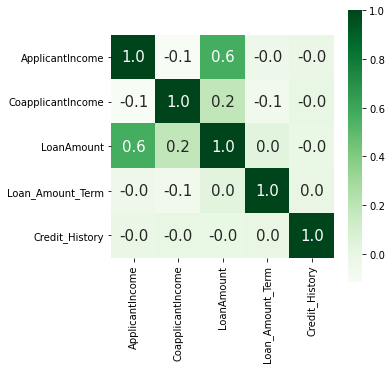

In [16]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(5,5))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [17]:
categorical_features = data.select_dtypes(include='object')
non_categorical_features = data.select_dtypes(exclude='object')

In [18]:
for i in categorical_features:
    categorical_features[i]=categorical_features[i].replace(np.nan,"Not Provided",regex=True)

<ipython-input-18-f97939b0267c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_features[i]=categorical_features[i].replace(np.nan,"Not Provided",regex=True)


In [19]:
for i in non_categorical_features:
    non_categorical_features[i]=non_categorical_features[i].replace(np.nan,0,regex=True)

<ipython-input-19-c17023cfedf4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_categorical_features[i]=non_categorical_features[i].replace(np.nan,0,regex=True)


In [20]:
non_categorical_features = pd.DataFrame(non_categorical_features)

In [21]:
non_categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
 4   Credit_History     614 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 24.1 KB


In [22]:
non_categorical_features.rename(columns={0:'ApplicantIncome',1:'CoapplicantIncome',2:'LoanAmount',
                                         3:'Loan_Amount_Term',4:'Credit_History'},inplace=True)

In [23]:
print(sum(categorical_features.isnull().sum()))
print(sum(non_categorical_features.isnull().sum()))

0
0


In [24]:
data = pd.concat([categorical_features,non_categorical_features],axis=1)

In [25]:
sum(data.isnull().sum())

0

In [26]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001002,Male,No,0,Graduate,No,Urban,Y,5849,0.0,0.0,360.0,1.0
1,LP001003,Male,Yes,1,Graduate,No,Rural,N,4583,1508.0,128.0,360.0,1.0
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y,3000,0.0,66.0,360.0,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y,2583,2358.0,120.0,360.0,1.0
4,LP001008,Male,No,0,Graduate,No,Urban,Y,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y,2900,0.0,71.0,360.0,1.0
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y,4106,0.0,40.0,180.0,1.0
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y,8072,240.0,253.0,360.0,1.0
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y,7583,0.0,187.0,360.0,1.0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   Property_Area      614 non-null    object 
 7   Loan_Status        614 non-null    object 
 8   ApplicantIncome    614 non-null    int64  
 9   CoapplicantIncome  614 non-null    float64
 10  LoanAmount         614 non-null    float64
 11  Loan_Amount_Term   614 non-null    float64
 12  Credit_History     614 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [28]:
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [29]:
#Data Extraction
y = data.Loan_Status
X = data.Credit_History

In [30]:
#Data Extraction
y = data.Loan_Status
X1 = data.iloc[:,0:7]
X2 = data.iloc[:,8:13]

X = pd.concat([X1,X2],axis=1)

In [31]:
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001002,Male,No,0,Graduate,No,Urban,5849,0.0,0.0,360.0,1.0
1,LP001003,Male,Yes,1,Graduate,No,Rural,4583,1508.0,128.0,360.0,1.0
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,3000,0.0,66.0,360.0,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,2583,2358.0,120.0,360.0,1.0
4,LP001008,Male,No,0,Graduate,No,Urban,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,2900,0.0,71.0,360.0,1.0
610,LP002979,Male,Yes,3+,Graduate,No,Rural,4106,0.0,40.0,180.0,1.0
611,LP002983,Male,Yes,1,Graduate,No,Urban,8072,240.0,253.0,360.0,1.0
612,LP002984,Male,Yes,2,Graduate,No,Urban,7583,0.0,187.0,360.0,1.0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3,random_state=42)

In [33]:
testData = pd.concat([X_test,y_test],axis=1)[:]

## We may have to encode the data to proceed further


In [34]:
#We may have to encode the data to proceed further
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
X= X.apply(LabelEncoder().fit_transform)

In [35]:
y = pd.factorize(y)[0]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3,random_state=42)

# Model Building

In [37]:
#Model Building
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\91948\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_prob = lr.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  

In [39]:
y_pred = np.where(y_prob > 0.7,1,0) # This will threshold the probabilities to give class predictions.

### ROC Curve

In [40]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7520512820512821

Text(0.5, 0, 'False Positive Rate')

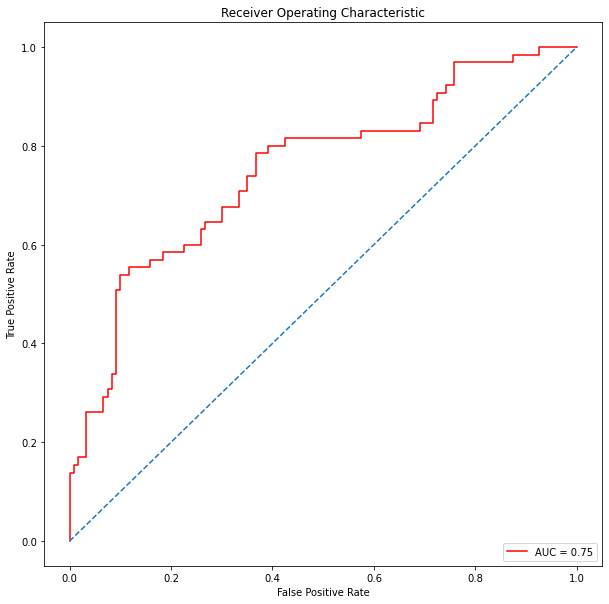

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Metrics Report

In [42]:
from sklearn.metrics import confusion_matrix,classification_report

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       120
           1       1.00      0.03      0.06        65

    accuracy                           0.66       185
   macro avg       0.83      0.52      0.43       185
weighted avg       0.78      0.66      0.53       185



In [44]:
confusion_matrix(y_test,y_pred)

array([[120,   0],
       [ 63,   2]], dtype=int64)

In [45]:
y_pred = pd.DataFrame(y_pred)

In [46]:
y_pred.shape

(185, 1)

In [47]:
y_pred.rename(columns={0:'PrediNcted_Loan_Status'},inplace=True)

In [48]:
loan_status_prediction = y_pred[:]

In [49]:
loan_status_prediction=loan_status_prediction.replace(1,"Y",regex=True)
loan_status_prediction=loan_status_prediction.replace(0,"N",regex=True)

In [50]:
loan_status_prediction.shape

(185, 1)

In [51]:
testData.shape

(185, 13)

In [52]:
finalPrediction = pd.concat([testData.reset_index(drop=True),loan_status_prediction],axis=1)

In [53]:
finalPrediction.shape

(185, 14)

In [54]:
finalPrediction.to_csv("final_prediction.csv")

# Hyper parameter Tuning and Optimization

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR_model= LogisticRegression()

tuned_parameters = {'C': [1,5,10,15,20] ,
                    'penalty':['l1','l2'],
                    'class_weight':[None,'balanced'],
                    'tol': [0.0001,0.1,0.3,0.4]                  
                   }

In [56]:
from sklearn.model_selection import GridSearchCV

LR= GridSearchCV(lr, tuned_parameters,cv=10)

In [ ]:
LR.fit(X_train,y_train)

In [ ]:
print(LR.best_params_)

#### Re-Train the Model after selecting the best hyper parameter

In [57]:
#Model Building
lr = LogisticRegression(C=10,tol=0.1,penalty='l2')
lr.fit(X_train,y_train)

C:\Users\91948\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, tol=0.1)

In [58]:
y_pred = lr.predict(X_test)

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       120
           1       0.74      0.52      0.61        65

    accuracy                           0.77       185
   macro avg       0.76      0.71      0.72       185
weighted avg       0.76      0.77      0.76       185



### Under Sampling

In [60]:
#NearMiss Package: Under Sampling Technique
from imblearn.under_sampling import NearMiss

In [61]:
nm1 = NearMiss(version=1)

In [ ]:
nm1.

In [62]:
#Initializing the Nearmiss Classifier
nm1 = NearMiss(version=1)

# Undersampling the data
X_resampled_nm1, y_resampled_nm1 = nm1.fit_resample(X, y)

In [63]:
X_resampled_nm1 = pd.DataFrame(X_resampled_nm1)
y_resampled_nm1 = pd.DataFrame(y_resampled_nm1)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled_nm1,y_resampled_nm1,test_size=0.3)

In [65]:
y_train.rename(columns={0:'Loan_Status'},inplace=True)
y_test.rename(columns={0:'Loan_Status'},inplace=True)

C:\Users\91948\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [66]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\91948\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\91948\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
predicted_lr_score = lr.predict(X_test)

In [68]:
print(classification_report(predicted_lr_score,y_test))

              precision    recall  f1-score   support

           0       0.79      0.58      0.67        71
           1       0.53      0.76      0.62        45

    accuracy                           0.65       116
   macro avg       0.66      0.67      0.65       116
weighted avg       0.69      0.65      0.65       116



### Over Sampling Techniques

In [69]:
from imblearn.over_sampling import SMOTE

In [71]:
# OverSampling the data
X_resampled_sm, y_resampled_sm = SMOTE().fit_resample(X,y)

In [72]:
X_resampled_sm = pd.DataFrame(X_resampled_sm)
y_resampled_sm = pd.DataFrame(y_resampled_sm)

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled_sm,y_resampled_sm,test_size=0.3)

In [74]:
y_train.rename(columns={0:'Loan_Status'},inplace=True)
y_test.rename(columns={0:'Loan_Status'},inplace=True)

C:\Users\91948\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [75]:
lr= LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\91948\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\91948\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
predicted_lr_score = lr.predict(X_test)

In [77]:
print(classification_report(predicted_lr_score,y_test))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       148
           1       0.64      0.77      0.70       106

    accuracy                           0.72       254
   macro avg       0.72      0.73      0.72       254
weighted avg       0.74      0.72      0.72       254

